In [20]:
#Librairies necessaires
import numpy as np
import urllib.parse
import pandas as pd
import requests
import os
import matplotlib.pyplot as plt
import math
import seaborn as sns 
from google.colab import drive
from  matplotlib.colors import LinearSegmentedColormap
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [3]:
data=pd.read_csv('/content/drive/MyDrive/projet_2023/Dataset_complete.csv')
data.head()

,initiator,target,protocol,nlos_indicator,t1,t2,t3,t4,skew,tof,...,course_dist,temperature_initiator,temperature_target,timestamp,seqnum,rssi_request,rssi_ack,rssi_data,rssi_mean,register_dump_CIR
0,183,100,TWR,2.783982,946218857614,946490292658,946594234510,946322802711,-2.368804,1622,...,0.0,30.98,30.220001,1654929794228,4,-80.136574,-80.077130,-79.836296,-80.016667,"{""ACC_MEM"": ""AAT/9gACAAr/+wABAAL/8wAS//AACgAGA..."
1,183,100,TWR,2.920485,1009474709646,1009746235572,1009850439822,1009578917162,-1.045965,1633,...,0.0,30.98,29.840002,1654929795219,10,-80.267769,-79.988684,-79.835720,-80.030724,"{""ACC_MEM"": ""//gAEwAC//X/9gAXABEACwASABQAFgAG/..."
2,183,100,TWR,2.536090,1072923068046,1073194681670,1073299179662,1073027569304,-0.799856,1633,...,0.0,30.98,29.840002,1654929796210,16,-79.964310,-79.850138,-79.693502,-79.835983,"{""ACC_MEM"": ""//QABQAJ//X/9gAUABMADv/3//r//gAK/..."
3,183,100,TWR,2.857669,36731534990,37003232943,37107270798,36835576116,-0.984438,1635,...,0.0,30.98,29.840002,1654929797201,22,-80.040833,-79.818313,-79.849525,-79.902890,"{""ACC_MEM"": ""ACb//AAa//4ADQAJAAYALf/+ABQAEgAOA..."
4,183,100,TWR,2.263103,99923195534,100194974620,100298828942,100027053147,-0.769092,1645,...,0.0,30.98,29.840002,1654929798190,28,-79.999908,-80.102552,-80.022316,-80.041592,"{""ACC_MEM"": ""//b/+P/6//3/8QAI//H//P/1AAkAAv/3A..."


In [4]:
data.shape

(3946, 32)

In [ ]:
#calcul de distance euclidienne
def distance_euclidienne(x1,x2,y1,y2,z1,z2):
  return(math.sqrt((x1-x2)**2+(y1-y2)**2)+(z1-z2)**2)

[0.         0.09984989 0.20008498 0.29944783 0.39929563 0.49953278
 0.59938051 0.69961775 0.79946545 0.89970273 0.9995504  1.09939847
 1.19963536 1.29948336 1.39972033 1.49956827 1.5998053  1.6996532
 1.79989027 1.89973814 1.9991008  2.09982309 2.19918576 2.29990804
 2.39927072 2.499993   2.59935569 2.70007796 2.79944066 2.89928853
 2.99952563 3.09937349 3.1996106  3.29945844 3.39969557 3.4995434
 3.60026568 3.69962836 3.79947628 3.89971332 3.99956123 4.09979829
 4.19964618 4.29988325 4.39973113 4.4990938  4.59981608 4.69917876
 4.79990104 4.89926372 4.999986   5.09934868 5.20007096 5.29943365
 5.39928153 5.49951862 5.59936648 5.69960358 5.79945144 5.89968855
 5.9995364  6.09977352 6.19962136 6.29946926 6.39970632 6.49955422
 6.59979128 6.69963917 6.79987625 6.89972412 6.99996121]


Text(0.5, 1.0, 'Variable course_dist')

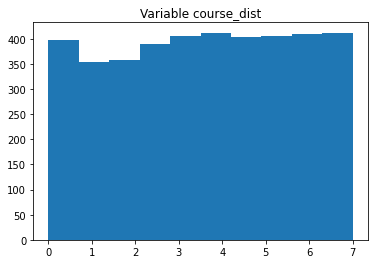

In [ ]:
#variable course_dist
print(np.unique(data['course_dist'])) #variable continue
plt.hist(data['course_dist'])
plt.title("Variable course_dist") #valeurs variant entre 0 et 7. Effectif plus eleve pour les valeurs egales à 4 et 0. Plus faible entre 0 et 1.

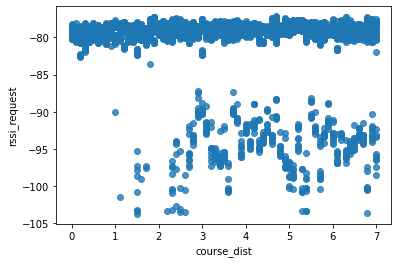

In [ ]:
sns.regplot(x=data["course_dist"], y=data["rssi_request"], fit_reg=False)
plt.title("Course_dist avec rssi_request")
plt.show()

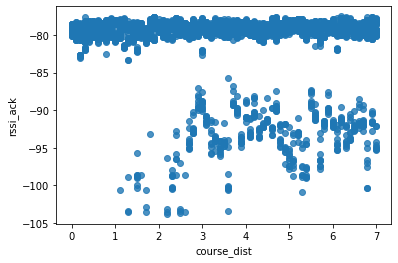

In [ ]:
sns.regplot(x=data["course_dist"], y=data["rssi_ack"], fit_reg=False)
plt.title("Course_dist avec rssi_ack")
plt.show()

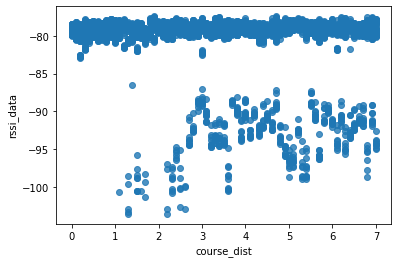

In [ ]:
sns.regplot(x=data["course_dist"], y=data["rssi_data"], fit_reg=False)
plt.title("Course_dist avec rssi_data")
plt.show()

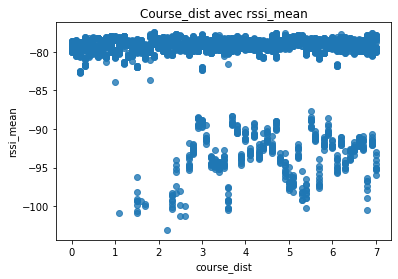

In [ ]:
sns.regplot(x=data["course_dist"], y=data["rssi_mean"], fit_reg=False)
plt.title("Course_dist avec rssi_mean")
plt.show()

[30.41     30.695    30.98     31.264999 31.549999 31.834999 32.119999
 32.404999 32.689999 32.974998 33.259998 33.544998 33.829998 33.830002
 34.114998 34.115002 34.400002 34.685001 34.970001 35.255001 35.540001
 35.825001 36.110001 36.395    36.68     36.965    37.25     37.535
 37.82     38.105    38.389999 38.674999 38.959999 39.244999 39.529999
 39.814999 40.099998 40.384998 40.385002 40.669998 40.670002 40.955002
 41.239998 41.240002 41.525002 41.810001 42.095001 42.380001]


Text(0.5, 1.0, 'Variable temperature_initiator')

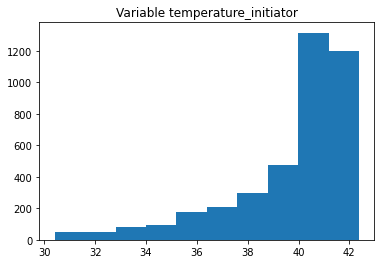

In [ ]:
#variable temperature_initiator
print(np.unique(data['temperature_initiator'])) #variable continue
plt.hist(data['temperature_initiator'])
plt.title("Variable temperature_initiator") #valeurs variant entre 30.41 et 42.38. Frequence plus elevee pour les valeurs entre 40 et 42 et tres faible pour les valeurs entre 30 et 39.

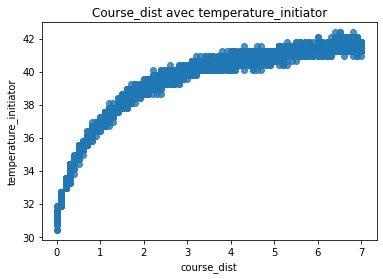

In [ ]:
sns.regplot(x=data["course_dist"], y=data["temperature_initiator"], fit_reg=False)
plt.title("Course_dist avec temperature_initiator")
plt.show()

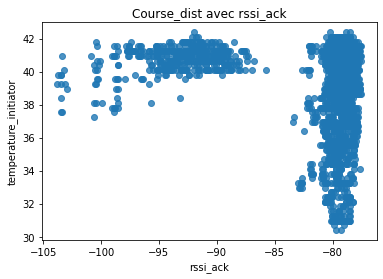

In [ ]:
sns.regplot(x=data["rssi_ack"], y=data["temperature_initiator"], fit_reg=False)
plt.title("Course_dist avec rssi_ack")
plt.show()

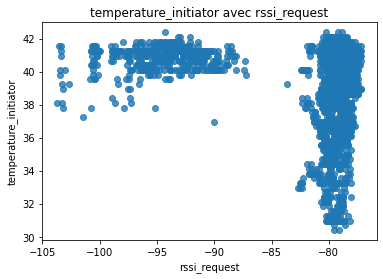

In [ ]:
sns.regplot(x=data["rssi_request"], y=data["temperature_initiator"], fit_reg=False)
plt.title("temperature_initiator avec rssi_request")
plt.show()

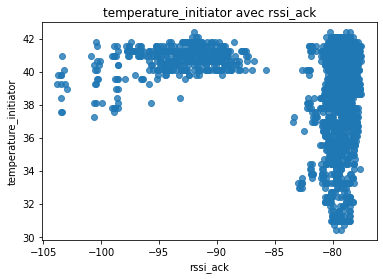

In [ ]:
sns.regplot(x=data["rssi_ack"], y=data["temperature_initiator"], fit_reg=False)
plt.title("temperature_initiator avec rssi_ack")
plt.show()

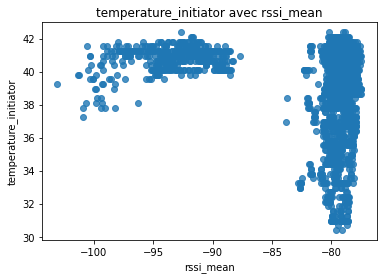

In [ ]:
sns.regplot(x=data["rssi_mean"], y=data["temperature_initiator"], fit_reg=False)
plt.title("temperature_initiator avec rssi_mean")
plt.show()

[27.559999 28.320002 28.700003 29.080002 29.460001 29.840002 30.220001
 30.6      30.980001 31.360001 31.74     32.119999 32.5      32.880001
 33.259998 33.639999 34.02     34.400002 34.780003 35.16     35.540001
 35.920002 36.299999 36.68     37.060001 37.439999 37.82     38.200001
 38.579998 38.959999 39.34     39.719997 40.099998 40.48     40.860001
 41.240002 41.619999 42.       42.380001 42.759998 43.139999 43.52
 43.899998 44.279999 44.66     45.039997 45.419998 45.799999 46.179996
 46.559998 46.939999 47.319996 47.320004]


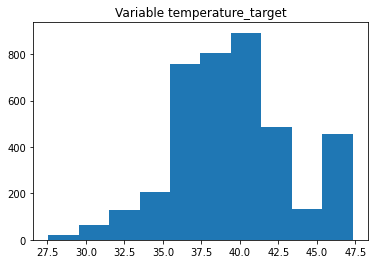

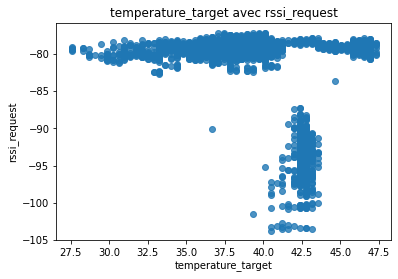

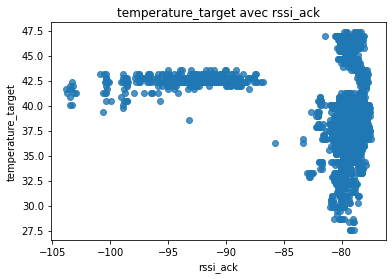

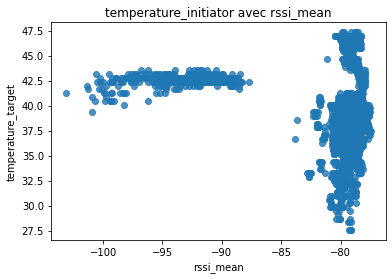

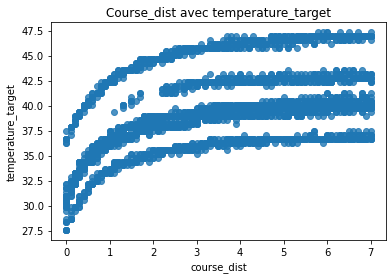

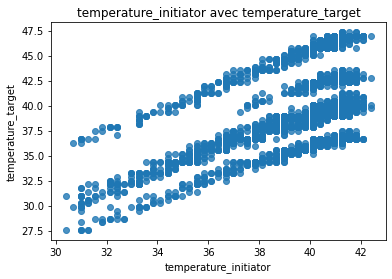

In [ ]:
plt.figure(1)
#variable temperature_target
print(np.unique(data['temperature_target'])) #variable continue
plt.hist(data['temperature_target'])
plt.title("Variable temperature_target") #valeurs variant entre 27.5 et 47.32. Frequence plus elevee pour les valeurs entre 37 et 40 tres faible pour les valeurs entre 30 et 39.
plt.figure(2)
sns.regplot(x=data["temperature_target"], y=data["rssi_request"], fit_reg=False)
plt.title("temperature_target avec rssi_request")
plt.show()
plt.figure(3)
sns.regplot(x=data["rssi_ack"], y=data["temperature_target"], fit_reg=False)
plt.title("temperature_target avec rssi_ack")
plt.show()
plt.figure(4)
sns.regplot(x=data["rssi_mean"], y=data["temperature_target"], fit_reg=False)
plt.title("temperature_initiator avec rssi_mean")
plt.show()
plt.figure(5)
sns.regplot(x=data["course_dist"], y=data["temperature_target"], fit_reg=False)
plt.title("Course_dist avec temperature_target")
plt.show()
plt.figure(6)
sns.regplot(x=data["temperature_initiator"], y=data["temperature_target"], fit_reg=False)
plt.title("temperature_initiator avec temperature_target")
plt.show()

[1654929793818 1654929794012 1654929794228 ... 1654930838982 1654930839174
 1654930839368]


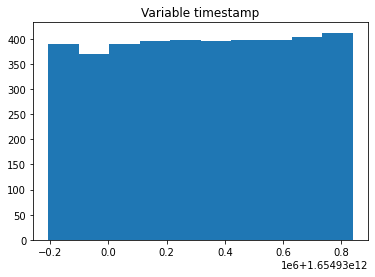

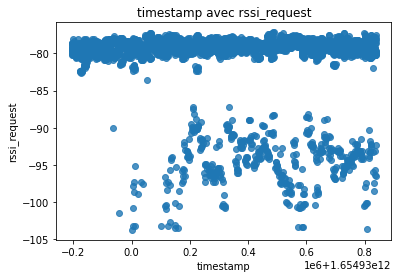

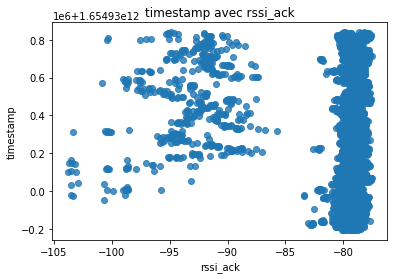

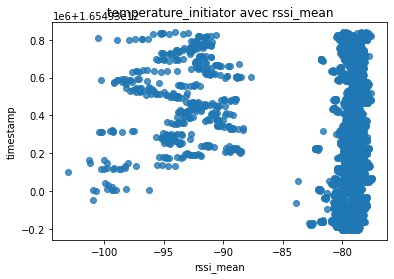

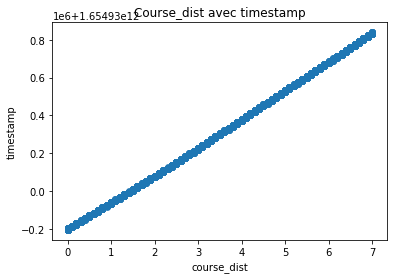

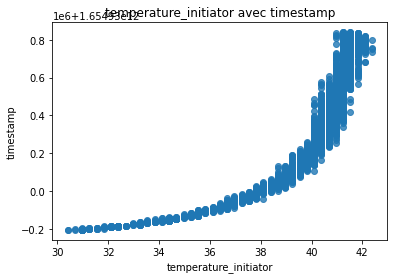

In [ ]:
print(np.unique(data['timestamp'])) #variable continue
plt.hist(data['timestamp'])
plt.title("Variable timestamp") #valeurs variant entre 27.5 et 47.32. Frequence plus elevee pour les valeurs entre 37 et 40 tres faible pour les valeurs entre 30 et 39.
plt.figure(2)
sns.regplot(x=data["timestamp"], y=data["rssi_request"], fit_reg=False)
plt.title("timestamp avec rssi_request")
plt.show()
plt.figure(3)
sns.regplot(x=data["rssi_ack"], y=data["timestamp"], fit_reg=False)
plt.title("timestamp avec rssi_ack")
plt.show()
plt.figure(4)
sns.regplot(x=data["rssi_mean"], y=data["timestamp"], fit_reg=False)
plt.title("temperature_initiator avec rssi_mean")
plt.show()
plt.figure(5)
sns.regplot(x=data["course_dist"], y=data["timestamp"], fit_reg=False)
plt.title("Course_dist avec timestamp")
plt.show()
plt.figure(6)
sns.regplot(x=data["temperature_initiator"], y=data["timestamp"], fit_reg=False)
plt.title("temperature_initiator avec timestamp")
plt.show()

<ipython-input-48-6b86ac2a42da>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(k)


ValueError: ignored

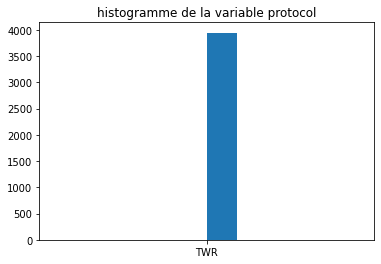

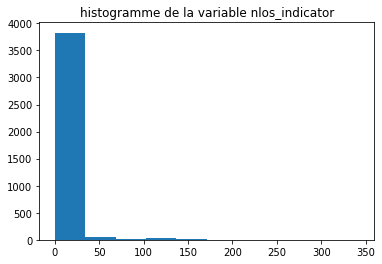

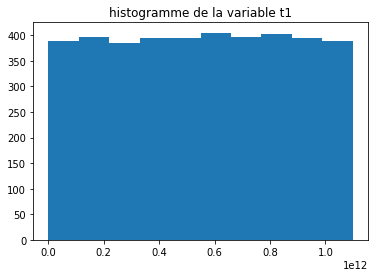

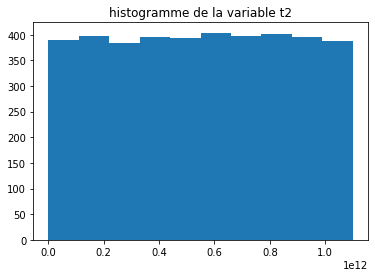

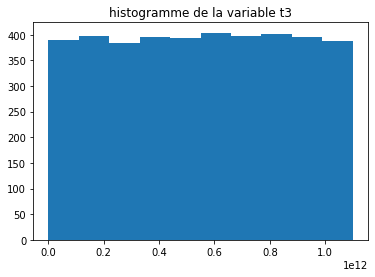

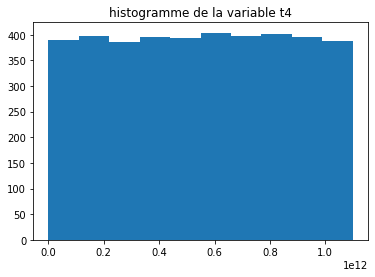

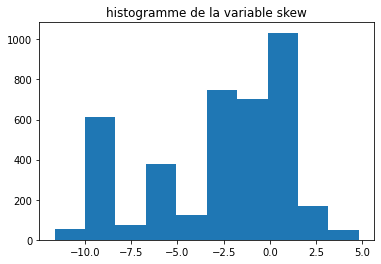

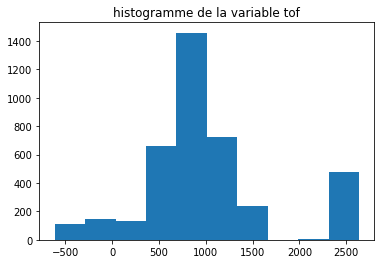

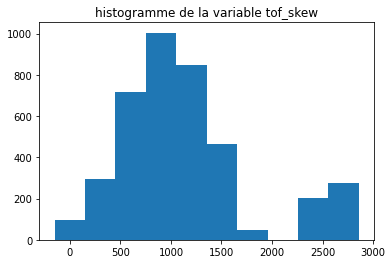

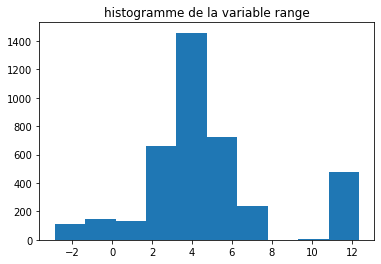

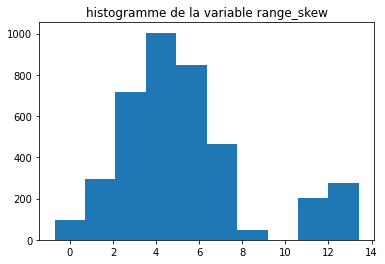

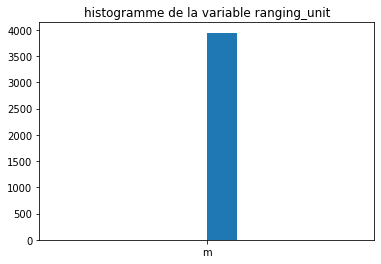

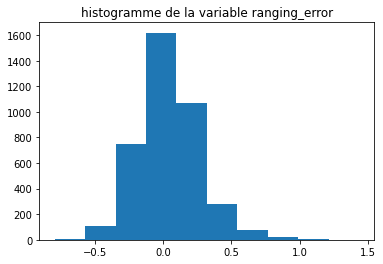

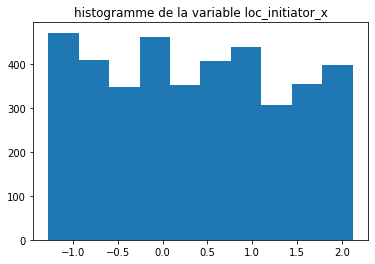

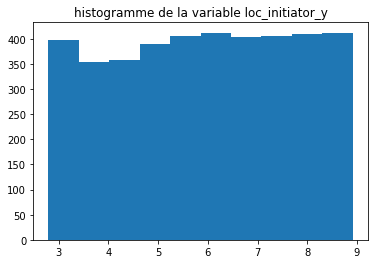

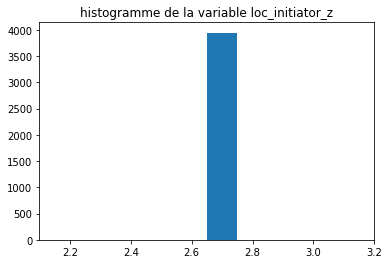

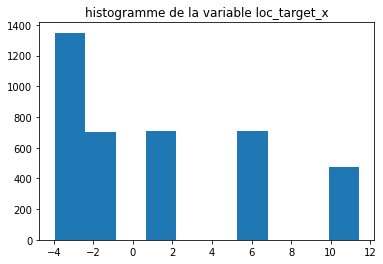

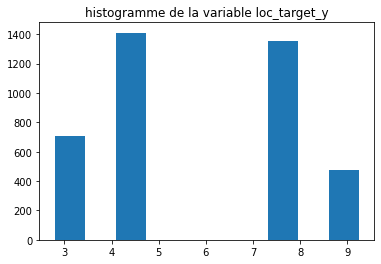

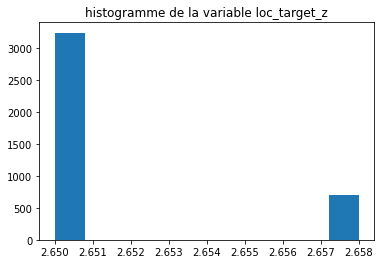

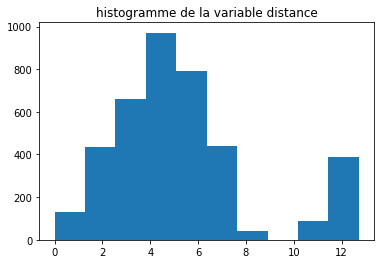

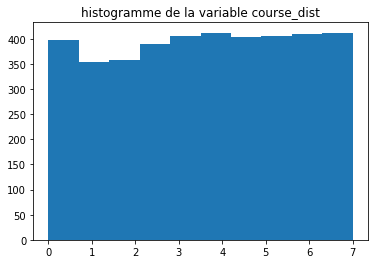

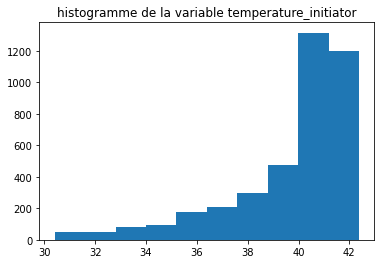

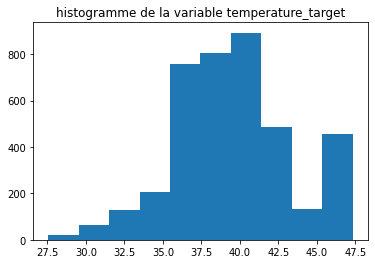

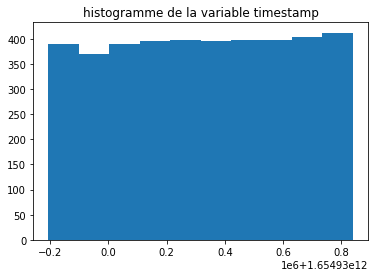

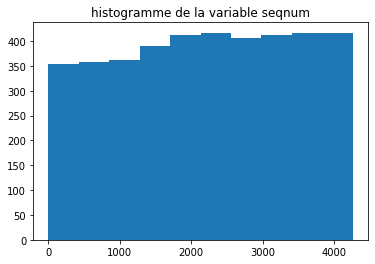

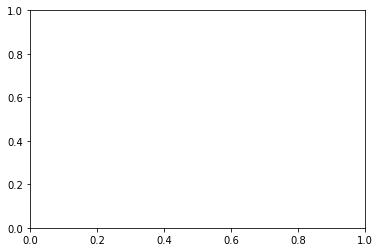

In [ ]:
k=1
colonnes=data.columns.tolist()
for variable in colonnes[2:]:
  plt.figure(k)
  plt.hist(data[variable])
  titre="histogramme de la variable " + variable
  plt.title(titre)
  k=k+1

In [5]:
data_nett=data.drop(['loc_initiator_z','ranging_unit','protocol','initiator','target', 'nlos_indicator','ranging_error', 'loc_target_z'], axis=1)

<ipython-input-56-a5cd9ef1f2dc>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fd59ddb4160> (for post_execute):


KeyboardInterrupt: ignored

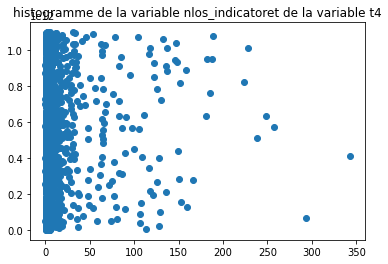

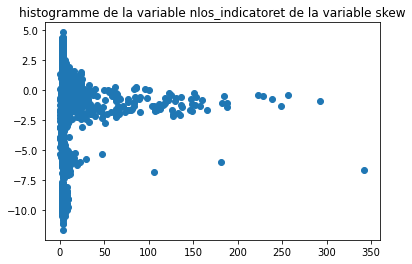

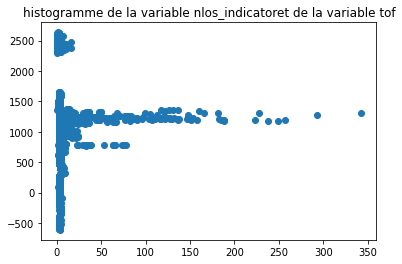

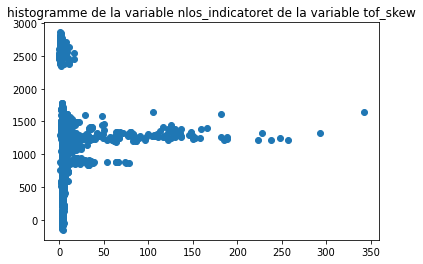

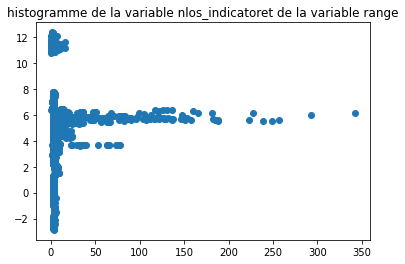

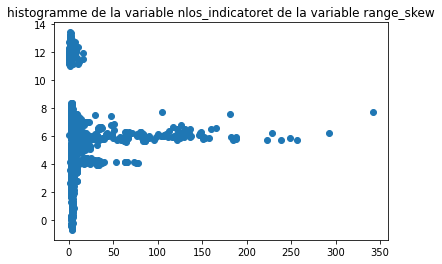

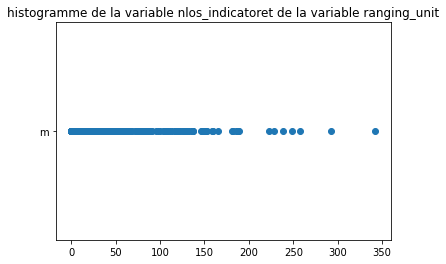

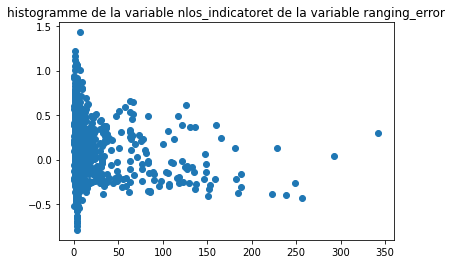

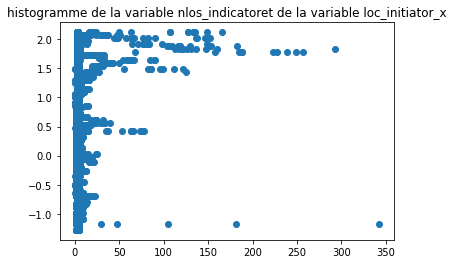

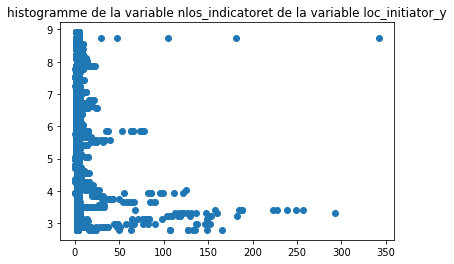

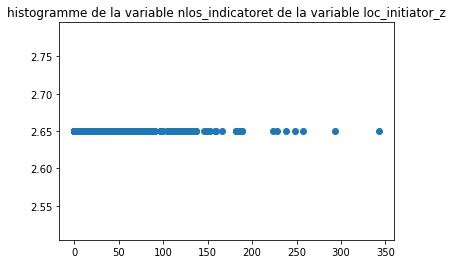

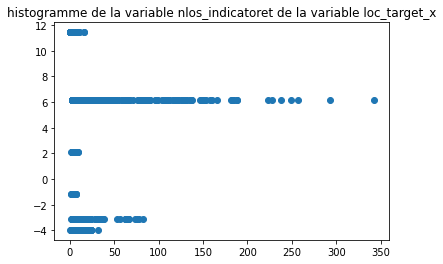

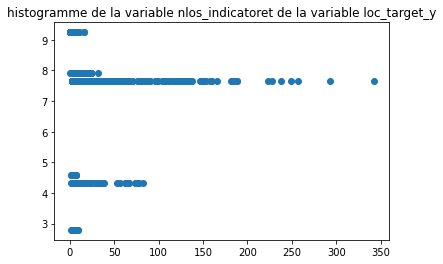

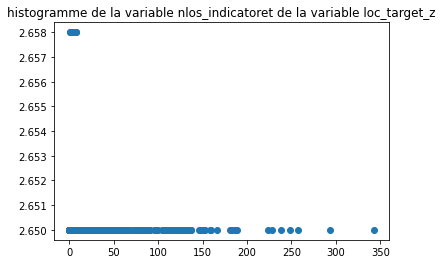

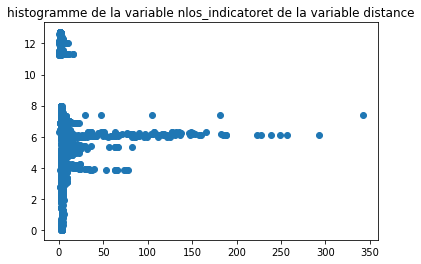

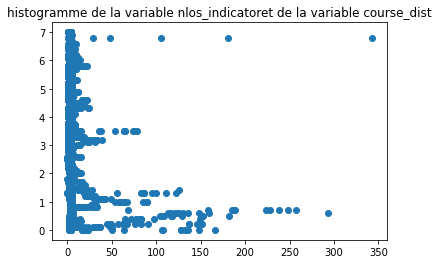

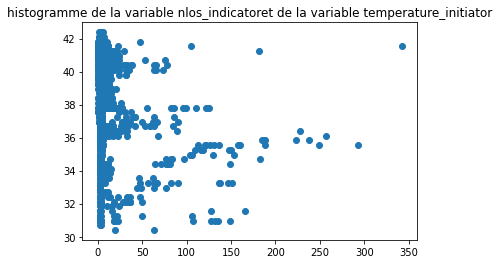

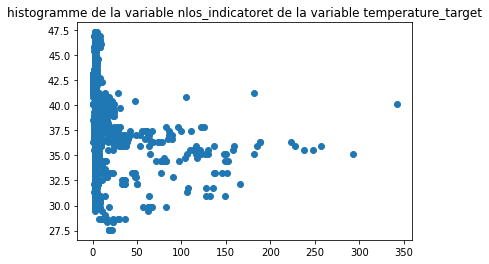

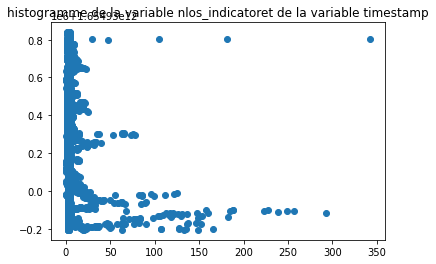

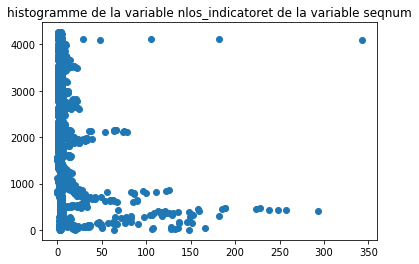

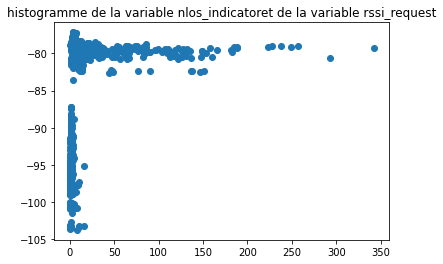

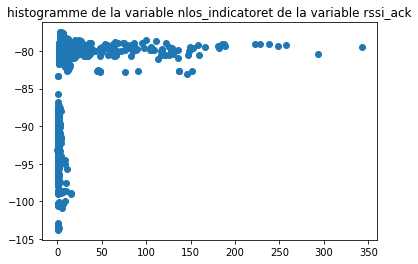

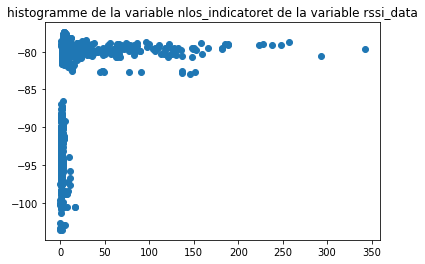

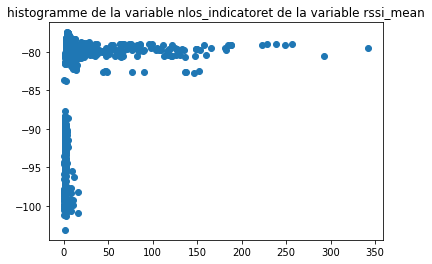

Error in callback <function flush_figures at 0x7fd59dad5d30> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
k=3
i=0
colonnes=data.columns.tolist()
colonnes=colonnes[3:]
for variable_a in colonnes:
  k=k+1
  colonnes_b=colonnes[k:]
  for variable_b in colonnes_b : 
    plt.figure(i)
    plt.scatter(x=data[variable_a], y=data[variable_b])
    #sns.regplot(x=data[variable_a], y=data[variable_b], fit_reg=False)
    titre="histogramme de la variable " + variable_a + "et de la variable " + variable_b
    plt.title(titre)
    i=i+1

In [6]:
matrix = data_nett.corr()
 
# print correlation matrix
print("Correlation Matrix is : ")
print(matrix)

Correlation Matrix is : 
                             t1        t2        t3        t4      skew  \
t1                     1.000000  1.000000  1.000000  1.000000 -0.002385   
t2                     1.000000  1.000000  1.000000  1.000000 -0.002454   
t3                     1.000000  1.000000  1.000000  1.000000 -0.002453   
t4                     1.000000  1.000000  1.000000  1.000000 -0.002384   
skew                  -0.002385 -0.002454 -0.002453 -0.002384  1.000000   
tof                   -0.002409 -0.002196 -0.002196 -0.002409  0.285031   
tof_skew              -0.001779 -0.001536 -0.001536 -0.001779 -0.003157   
range                 -0.002409 -0.002196 -0.002196 -0.002409  0.285031   
range_skew            -0.001779 -0.001536 -0.001536 -0.001779 -0.003157   
loc_initiator_x        0.008364  0.008184  0.008184  0.008364  0.112759   
loc_initiator_y       -0.008378 -0.008199 -0.008199 -0.008378 -0.112758   
loc_target_x          -0.001512 -0.001379 -0.001379 -0.001513 -0.369812   


In [7]:
corr=pd.DataFrame(matrix)

,t1,t2,t3,t4,skew,tof,tof_skew,range,range_skew,loc_initiator_x,...,distance,course_dist,temperature_initiator,temperature_target,timestamp,seqnum,rssi_request,rssi_ack,rssi_data,rssi_mean
t1,1.000000,1.000000,1.000000,1.000000,-0.002385,-0.002409,-0.001779,-0.002409,-0.001779,0.008364,...,-0.001652,-0.008374,-0.006168,-0.009623,-0.008169,-0.008179,0.005673,0.003064,0.002777,0.003606
t2,1.000000,1.000000,1.000000,1.000000,-0.002454,-0.002196,-0.001536,-0.002196,-0.001536,0.008184,...,-0.001415,-0.008195,-0.006019,-0.009639,-0.007989,-0.008000,0.005586,0.002983,0.002696,0.003520
t3,1.000000,1.000000,1.000000,1.000000,-0.002453,-0.002196,-0.001536,-0.002196,-0.001536,0.008184,...,-0.001415,-0.008195,-0.006019,-0.009639,-0.007989,-0.008000,0.005586,0.002983,0.002696,0.003520
t4,1.000000,1.000000,1.000000,1.000000,-0.002384,-0.002409,-0.001779,-0.002409,-0.001779,0.008364,...,-0.001652,-0.008374,-0.006168,-0.009624,-0.008168,-0.008179,0.005673,0.003064,0.002777,0.003606
skew,-0.002385,-0.002454,-0.002453,-0.002384,1.000000,0.285031,-0.003157,0.285031,-0.003157,0.112759,...,-0.004587,-0.112758,-0.116582,-0.644079,-0.110958,-0.111462,-0.022854,-0.025536,-0.026014,-0.025350
tof,-0.002409,-0.002196,-0.002196,-0.002409,0.285031,1.000000,0.957612,1.000000,0.957612,-0.173779,...,0.954879,0.173776,0.129241,-0.025669,0.174509,0.173775,-0.805072,-0.799408,-0.802169,-0.806610
tof_skew,-0.001779,-0.001536,-0.001536,-0.001779,-0.003157,0.957612,1.000000,0.957612,1.000000,-0.215134,...,0.997571,0.215130,0.169785,0.166641,0.215356,0.214740,-0.833718,-0.826769,-0.829204,-0.834674
range,-0.002409,-0.002196,-0.002196,-0.002409,0.285031,1.000000,0.957612,1.000000,0.957612,-0.173779,...,0.954879,0.173776,0.129241,-0.025669,0.174509,0.173775,-0.805072,-0.799408,-0.802169,-0.806610
range_skew,-0.001779,-0.001536,-0.001536,-0.001779,-0.003157,0.957612,1.000000,0.957612,1.000000,-0.215134,...,0.997571,0.215130,0.169785,0.166641,0.215356,0.214740,-0.833718,-0.826769,-0.829204,-0.834674
loc_initiator_x,0.008364,0.008184,0.008184,0.008364,0.112759,-0.173779,-0.215134,-0.173779,-0.215134,1.000000,...,-0.213308,-1.000000,-0.862861,-0.486739,-0.999776,-0.999899,0.148005,0.126707,0.123364,0.142793


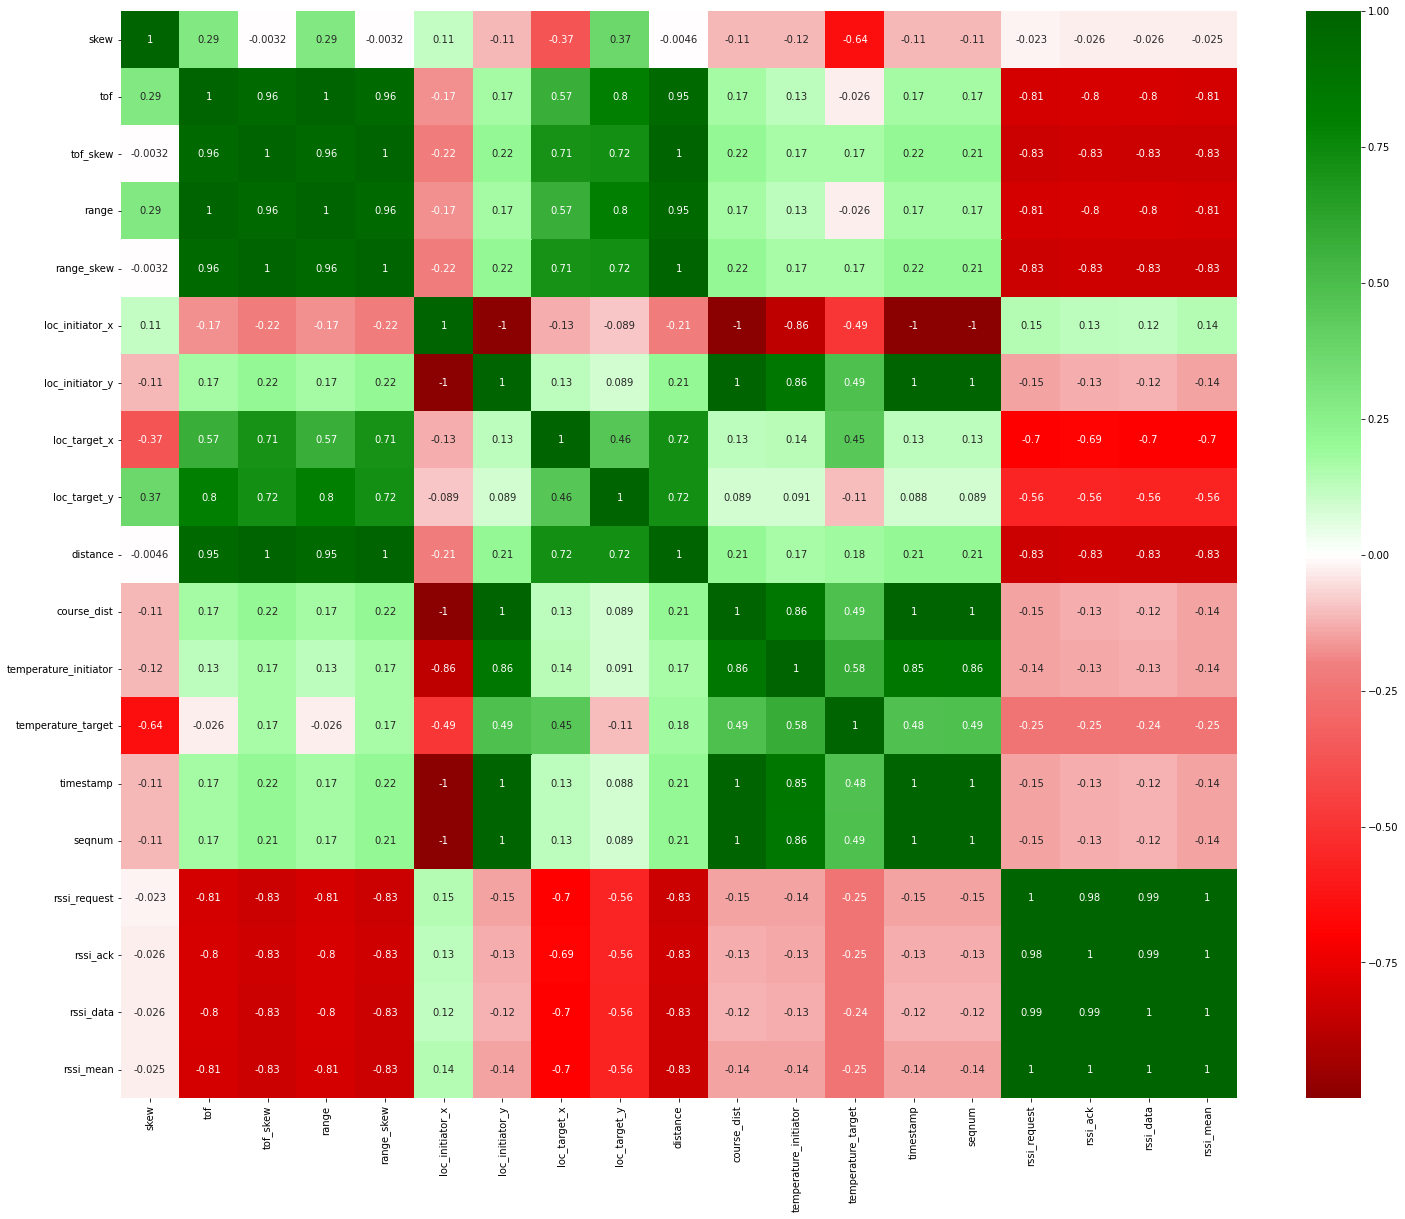

In [26]:
data_nett=data.drop(['loc_initiator_z','ranging_unit','protocol','initiator','target', 'nlos_indicator','ranging_error', 'loc_target_z', 't1', 't2', 't3', 't4'], axis=1)
matrix = data_nett.corr()
corr=pd.DataFrame(matrix)
c = ["darkred","red","lightcoral","white", "palegreen","green","darkgreen"]
v = [0,.15,.4,.5,0.6,.9,1.]
l = list(zip(v,c))
GnRd=LinearSegmentedColormap.from_list('rg',l, N=256)
plt.figure(1,figsize = (25, 20))
ax = sns.heatmap(data_nett.corr(), annot=True,cmap=GnRd)

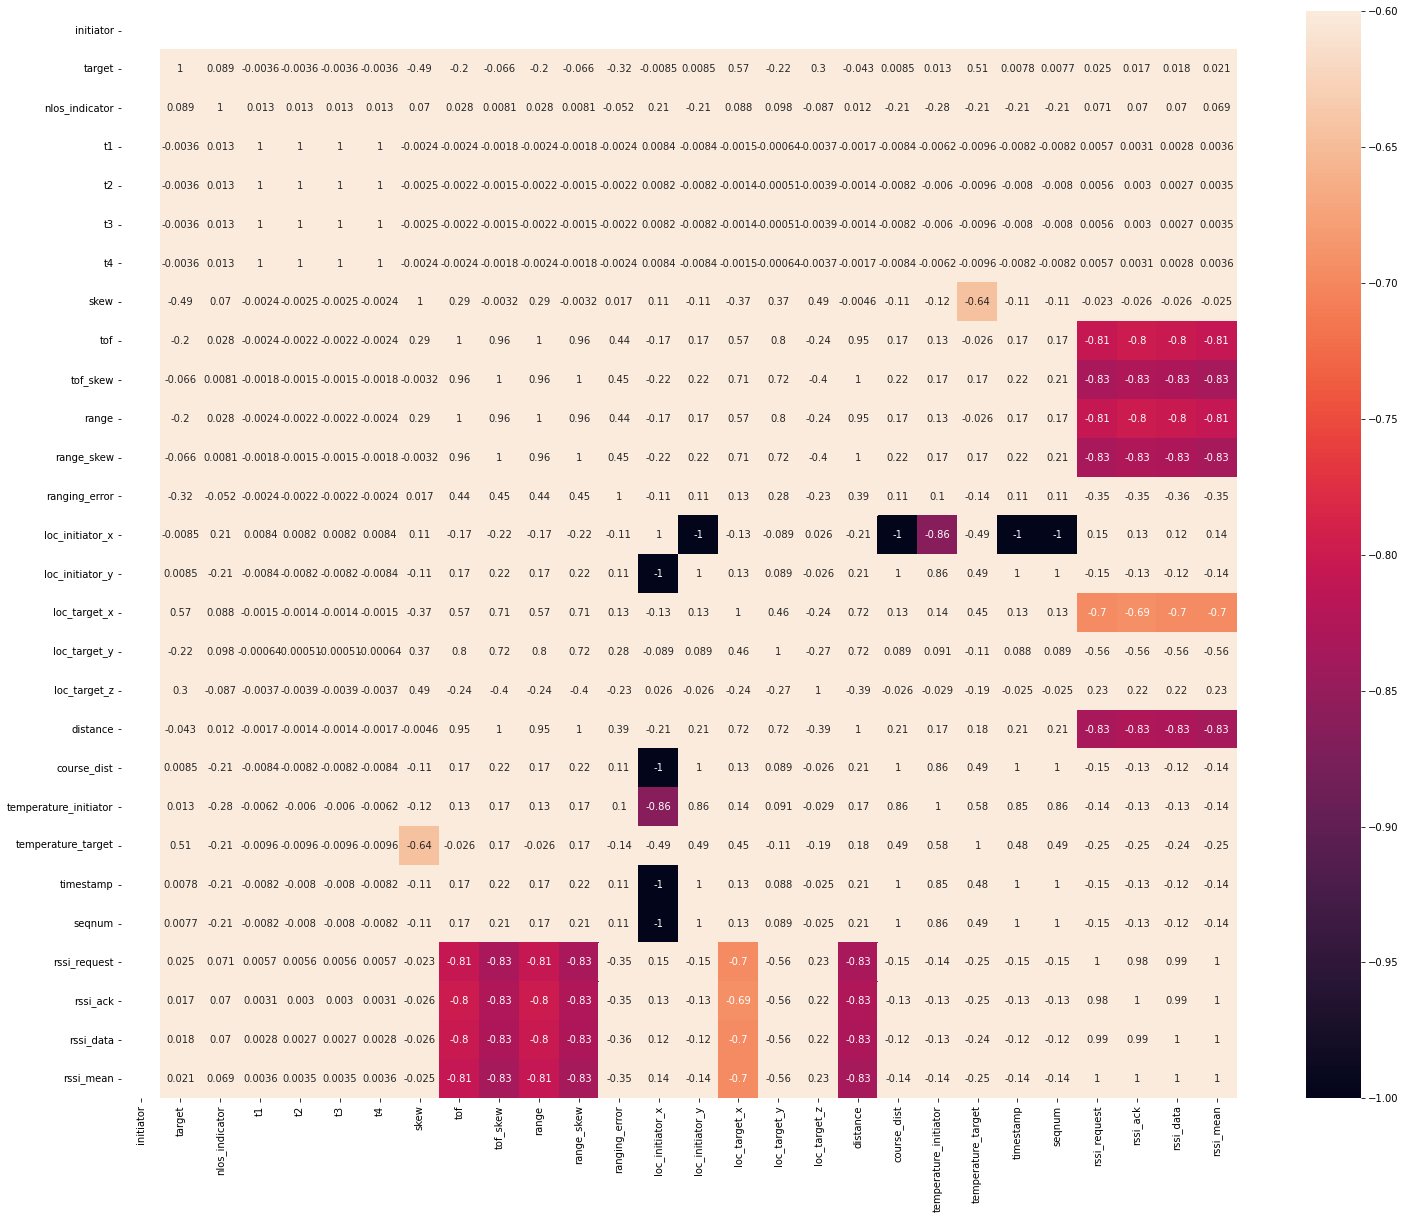

In [ ]:
plt.figure(1,figsize = (25, 20))
ax = sns.heatmap(data_nett.corr(), vmin=-1, vmax=-0.6, annot=True)

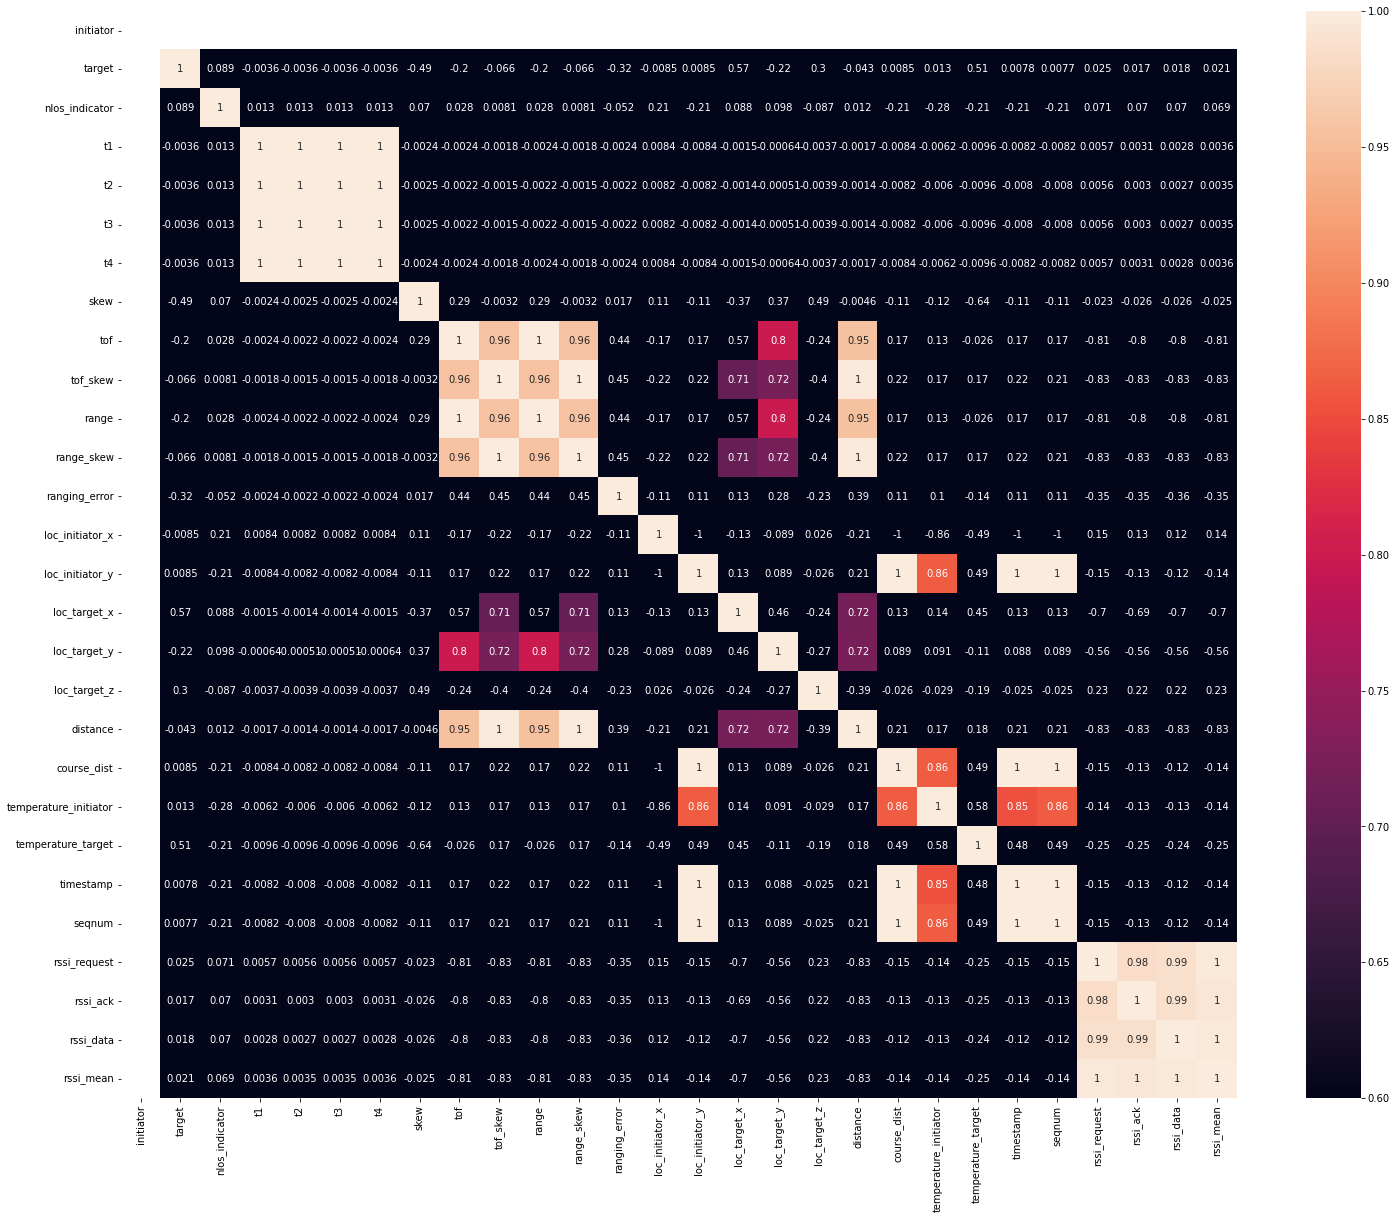

In [ ]:
plt.figure(1,figsize = (25, 20))
ax = sns.heatmap(data_nett.corr(), vmin=0.6, vmax=1, annot=True)